In [6]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

In [7]:
from defectlib import maybe_pickle

In [8]:
maybe_pickle('./defect_tensors_D10_1/')

100%|██████████| 10/10 [00:12<00:00,  1.44s/it]


In [9]:
defect_dict = load_tensors_all('./defect_tensors_D10_1/8#DWZ/', width=128)

(53, 78, 81)
(27, 78, 81)
(11, 76, 63)
(6, 76, 63)


In [10]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 97
number of class 0: 64
	number of SN: 10
number of class 3: 33
	number of SN: 7


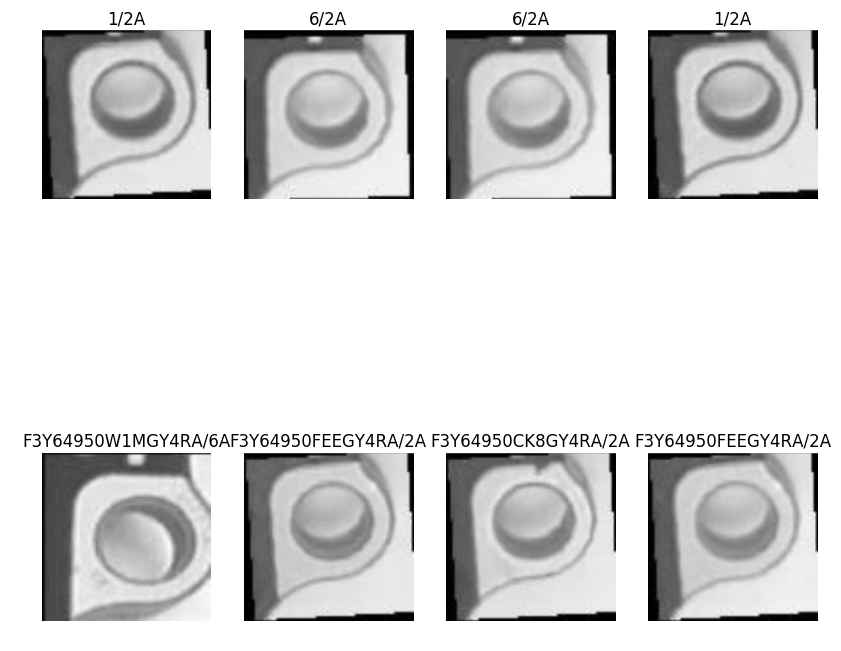

In [11]:
display_tensor(tensors, labels, sns)

In [13]:
from defectlib import GroupKFold_modeling

In [15]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors, labels, sns, nb_classes=4, nb_epoch=30, input_shape=(128, 128))

Model 1
the label of validation image: 0
the s/n of validation image: 0
Train on 89 samples, validate on 8 samples
Epoch 1/30
89/89 [==============================] - 1s - loss: 1.0631 - acc: 0.4944 - val_loss: 0.0974 - val_acc: 1.0000
Epoch 2/30
89/89 [==============================] - 1s - loss: 0.8712 - acc: 0.6292 - val_loss: 0.5631 - val_acc: 1.0000
Epoch 3/30
89/89 [==============================] - 1s - loss: 0.6213 - acc: 0.6854 - val_loss: 0.5495 - val_acc: 1.0000
Epoch 4/30
89/89 [==============================] - 1s - loss: 0.5887 - acc: 0.7079 - val_loss: 0.3204 - val_acc: 1.0000
Epoch 5/30
89/89 [==============================] - 1s - loss: 0.5963 - acc: 0.6854 - val_loss: 0.0876 - val_acc: 1.0000
Epoch 6/30
89/89 [==============================] - 1s - loss: 0.5080 - acc: 0.7416 - val_loss: 0.2058 - val_acc: 1.0000
Epoch 7/30
89/89 [==============================] - 1s - loss: 0.4051 - acc: 0.8202 - val_loss: 0.1106 - val_acc: 1.0000
Epoch 8/30
89/89 [====================

In [17]:
sorted(accuracy_escape_list, key=lambda x:x[0])

[(0, '0', 1.0, 1.0),
 (0, '4', 1.0, 1.0),
 (0, '1', 0.14285714285714285, 0.14285714285714285),
 (0, '5', 1.0, 1.0),
 (0, '6', 1.0, 1.0),
 (0, '7', 1.0, 1.0),
 (0, '8', 1.0, 1.0),
 (0, '9', 1.0, 1.0),
 (0, '3', 1.0, 1.0),
 (0, '2', 1.0, 1.0),
 (3, 'F3Y64950FEEGY4RA', 0.8571428571428571, 0.14285714285714285),
 (3, 'F3Y64950CK8GY4RA', 1.0, 0.0),
 (3, 'F3Y64950W1MGY4RA', 0.83333333333333337, 0.16666666666666666),
 (3, 'F3Y649409EAGY4VB', 0.0, 1.0),
 (3, 'F3Y64950VRLGY4RA', 0.0, 1.0),
 (3, 'F3Y64950F2QGY4RA', 0.0, 1.0),
 (3, 'F3Y649512AUGY4TA', 1.0, 0.0)]